In [1]:
!pip install fbprophet

In [7]:
from fbprophet import Prophet
import pandas as pd
%matplotlib inline

In [8]:
#Read the data from csv file

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Miles_Traveled.csv')
df.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [9]:
# It is require to rename the Date type column ds  & target column into y
# As Prophet understand the same while buliding the model.

df.columns = ['ds','y']
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [10]:
# Lets understand the datatype,null value of column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      588 non-null    object 
 1   y       588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [11]:
# Convert the ds column type to datetime 

df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


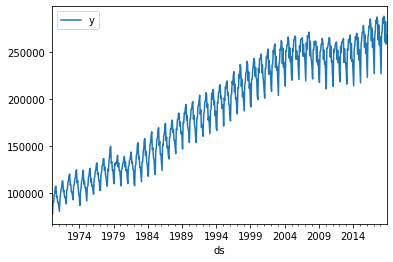

In [12]:
# Plot the graph
df.plot(x='ds',y='y')

In [13]:
#Total number of rows of data
len(df)


588

In [14]:
# Split the data into train & test , Consider last 12 month data into test

train = df.iloc[:576]
test  = df.iloc[576:]

In [15]:
test.tail()

,ds,y
583,2018-08-01,286608.0
584,2018-09-01,260595.0
585,2018-10-01,282174.0
586,2018-11-01,258590.0
587,2018-12-01,268413.0


In [16]:
m = Prophet()
m.fit(train)         # train the train model
future = m.make_future_dataframe(periods=12,freq="MS") #Consider periods same as train & Monthly data so freq as MS
forecast = m.predict(future)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
#lets get last few rows of predction
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
583,2018-08-01,263457.725002,274083.463174,285973.482460,263382.653674,263506.738892,16443.644514,16443.644514,16443.644514,16443.644514,16443.644514,16443.644514,0.0,0.0,0.0,279901.369516
584,2018-09-01,263600.413936,256189.812070,268055.395055,263485.804748,263672.067396,-1674.285262,-1674.285262,-1674.285262,-1674.285262,-1674.285262,-1674.285262,0.0,0.0,0.0,261926.128674
585,2018-10-01,263738.500000,263236.892075,274941.453729,263576.271104,263839.671921,5300.999421,5300.999421,5300.999421,5300.999421,5300.999421,5300.999421,0.0,0.0,0.0,269039.499421
586,2018-11-01,263881.188934,249861.860291,261580.971121,263691.340338,264000.347045,-8214.645301,-8214.645301,-8214.645301,-8214.645301,-8214.645301,-8214.645301,0.0,0.0,0.0,255666.543633
587,2018-12-01,264019.274999,251478.142498,262709.298310,263804.333117,264169.514038,-6925.081926,-6925.081926,-6925.081926,-6925.081926,-6925.081926,-6925.081926,0.0,0.0,0.0,257094.193073


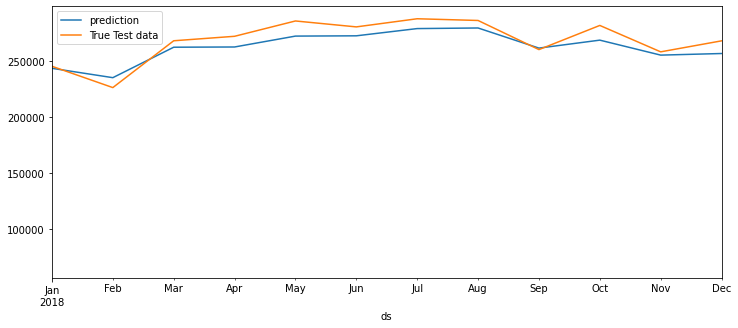

In [18]:
# This will plot the graph between Actual data & Prediction between 1st Jan 2018 to 01st Dec 2018

ax = forecast.plot(x='ds',y='yhat',label='prediction',legend=True,figsize=(12,5))


test.plot(x='ds',y='y',label='True Test data',legend=True,ax=ax,xlim=('2018-01-01','2018-12-01'))

In [19]:
# Here we calculate the error (root mean square error)

from statsmodels.tools.eval_measures import rmse

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [20]:
prediction = forecast[-12:]['yhat'] #We consider last 12 rows of yhat column 
prediction

576    243890.540695
577    235518.185920
578    262721.044615
579    262926.543476
580    272653.963220
581    272904.801470
582    279365.372083
583    279901.369516
584    261926.128674
585    269039.499421
586    255666.543633
587    257094.193073
Name: yhat, dtype: float64

In [21]:
test['y'] #Observed y column of test 

576    245695.0
577    226660.0
578    268480.0
579    272475.0
580    286164.0
581    280877.0
582    288145.0
583    286608.0
584    260595.0
585    282174.0
586    258590.0
587    268413.0
Name: y, dtype: float64

In [22]:
rmse(prediction,test['y']) #RMSE between Prediction & Y

8588.50451989775

In [48]:
test.mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



y    268739.666667
dtype: float64

In [23]:
# lets do cross validation 

from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [24]:
# for cross validation we have to give input as INITIAL , PERIOD & HORIZON

#INITIAL - Consider first 5 year

initial = 5 * 365
initial = str(initial) + 'days'

# PERIOD - It means How many time folds , let consider every 5 year

period = 5 * 365
period = str(period) + 'days'

# HORIZON - How many year do you want forecast - we consider 1 year

horizon = 365
horizon = str(horizon) + 'days'


In [25]:
df_cv = cross_validation(m,initial=initial,period=period,horizon=horizon)

INFO:fbprophet:Making 9 forecasts with cutoffs between 1976-12-11 00:00:00 and 2016-12-01 00:00:00


In [26]:
#From above result we do understand that there are 9 forecast.

df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108479.087478,107014.828086,109936.342389,102445.0,1976-12-11
1,1977-02-01,102996.111557,101623.231375,104395.551682,102416.0,1976-12-11
2,1977-03-01,118973.318267,117560.529826,120311.026075,119960.0,1976-12-11
3,1977-04-01,120612.923861,119147.998984,122015.654429,121513.0,1976-12-11
4,1977-05-01,127883.031986,126462.066671,129298.588531,128884.0,1976-12-11


In [27]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,52 days,2.430030e+07,4929.533140,4534.578066,0.027790,0.023419,0.3
1,53 days,2.180221e+07,4669.283718,4269.242480,0.025045,0.023419,0.3
2,54 days,1.835927e+07,4284.771500,3749.319270,0.020183,0.022331,0.4
3,55 days,2.318231e+07,4814.801050,4262.593972,0.023194,0.023419,0.3
4,57 days,2.101189e+07,4583.872792,4000.766561,0.021482,0.022331,0.4
...,...,...,...,...,...,...,...
94,360 days,1.833685e+07,4282.155252,3750.317263,0.019550,0.019595,0.5
95,361 days,1.744517e+07,4176.741529,3472.704963,0.018164,0.018940,0.5
96,362 days,3.175299e+07,5634.978870,4397.649029,0.021959,0.024754,0.4
97,364 days,3.001684e+07,5478.762932,4235.776363,0.021356,0.021737,0.5


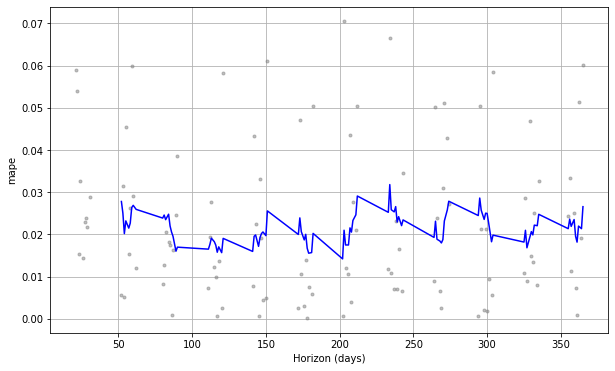

In [29]:
#Plot specific metrics. graph

plot_cross_validation_metric(df_cv,metric='mape');